In [1]:
#Chunk that sloads necessary packages & sets working environment to where the jupyterlab notebook file is 
%load_ext autoreload
%autoreload 2
import gnssvod as gv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pdb
import importlib
import zipfile
import os
import xarray as xr
import glob
import shutil
from gnssvod.hemistats.hemistats import hemibuild
#import georinex as gr
#import qgrid as interactive table 
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates
import shutil
from matplotlib import rcParams
from datetime import datetime, timedelta
import seaborn as sns



In [2]:
pattern={'MACROCOSM-5':'/Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-5/*.nc',
         'MACROCOSM-2':'/Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-2/*.nc'}

In [3]:
startday = pd.to_datetime('11-01-2025',format='%d-%m-%Y')
timeintervals=pd.interval_range(start=startday, periods=2, freq='h', closed='left')
timeintervals

IntervalIndex([[2025-01-11 00:00:00, 2025-01-11 01:00:00), [2025-01-11 01:00:00, 2025-01-11 02:00:00)], dtype='interval[datetime64[ns], left]')

MACROCOSM 5

In [4]:
# Define path to NetCDF files
nc5_files = glob.glob('/Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-5/*.nc')  # Get all .nc files
nc2_files = glob.glob('/Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-2/*.nc')


In [5]:

# Process each file separately
for file in nc2_files:
    print(f"Processing file: {file}")
    ds2= xr.open_dataset(file)  
    df2 = ds2.to_dataframe().dropna(how='all')  
    df2= df2.reorder_levels(["Epoch", "SV"]).sort_index()
    print(df2.head())  


Processing file: /Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-2/MACROCOSM-2_raw_202501132108.nc
                         S1C   S1X  S2C  S2X  Azimuth  Elevation
Epoch               SV                                          
2025-01-13 21:08:30 C12  NaN   NaN  NaN  NaN   -110.6       29.5
                    C24  NaN   NaN  NaN  NaN    -38.0       18.5
                    C26  NaN   NaN  NaN  NaN    -38.0       69.8
                    C35  NaN   NaN  NaN  NaN     -1.5       55.7
                    E02  NaN  42.5  NaN  NaN     31.7       58.0
Processing file: /Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-2/MACROCOSM-2_raw_202501112108.nc
                          S1C  S1X  S2C   S2X  Azimuth  Elevation
Epoch               SV                                           
2025-01-11 21:09:00 C11   NaN  NaN  NaN   NaN    -15.4       61.8
                    G01  43.6  NaN  NaN   NaN     46.8       62.5
                    G02  45.0  NaN  NaN   NaN     32.0       55.9
       

In [6]:
for file in nc5_files:
    print(f"Processing file: {file}")
    ds5= xr.open_dataset(file)  
    df5 = ds5.to_dataframe().dropna(how='all')  
    df5= df5.reorder_levels(["Epoch", "SV"]).sort_index()
    print(df5.head())  

Processing file: /Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-5/MACROCOSM-5_raw_202501111229.nc
                         S1C   S1X  S2C  S2X  Azimuth  Elevation
Epoch               SV                                          
2025-01-11 12:30:15 C21  NaN   NaN  NaN  NaN    -25.2       46.1
                    C22  NaN   NaN  NaN  NaN     95.5       69.7
                    C26  NaN   NaN  NaN  NaN   -115.3       41.0
                    E21  NaN  45.9  NaN  NaN   -169.7       51.9
                    E27  NaN  44.0  NaN  NaN     67.1       62.6
Processing file: /Volumes/coraldelmar/gnss.vod/water_exp/nc/MACROCOSM-5/MACROCOSM-5_raw_202501111928.nc
                         S1C  S1X  S2C  S2X  Azimuth  Elevation
Epoch               SV                                         
2025-01-11 19:28:45 C11  NaN  NaN  NaN  NaN   -137.8       63.4
                    C12  NaN  NaN  NaN  NaN     31.6       57.6
                    C24  NaN  NaN  NaN  NaN     72.0       61.0
                 

In [7]:
df2 = df2.copy()
df5 = df5.copy()

df2["Station"] = "MACROCOSM-2"
df5["Station"] = "MACROCOSM-5"


In [8]:
df2.set_index("Station", append=True, inplace=True)
df5.set_index("Station", append=True, inplace=True)


In [9]:
df = pd.concat([df5, df2])


In [10]:
df.head()

,,,S1C,S1X,S2C,S2X,Azimuth,Elevation
Epoch,SV,Station,,,,,,
2025-01-11 20:28:45,C34,MACROCOSM-5,NaN,NaN,NaN,NaN,8.2,59.9
2025-01-11 20:29:00,C34,MACROCOSM-5,NaN,NaN,NaN,NaN,8.3,59.8
2025-01-11 20:29:15,C34,MACROCOSM-5,NaN,NaN,NaN,NaN,8.3,59.7
2025-01-11 20:29:30,C34,MACROCOSM-5,NaN,NaN,NaN,NaN,8.4,59.6
2025-01-11 20:29:45,C34,MACROCOSM-5,NaN,NaN,NaN,NaN,8.5,59.5


In [11]:
#RESETTING TIMESTAMP TO PR TIME
df= df.reset_index()
df['Epoch'] = pd.to_datetime(df['Epoch'])
df['Epoch']=df['Epoch']+timedelta(hours=-5) #

In [12]:
df['Zenith'] = 90 - df['Elevation']
#filtered_df = df[(df['Zenith'] >= 20) & (df['Zenith'] <= 30)].copy()
filtered_df = df[df['Zenith'] <= 50].copy()
filtered_df = filtered_df.set_index(['Epoch', 'SV','Station'])

print(filtered_df.index)

MultiIndex([('2025-01-11 15:28:45', 'C34', 'MACROCOSM-5'),
            ('2025-01-11 15:29:00', 'C34', 'MACROCOSM-5'),
            ('2025-01-11 15:29:15', 'C34', 'MACROCOSM-5'),
            ('2025-01-11 15:29:30', 'C34', 'MACROCOSM-5'),
            ('2025-01-11 15:29:45', 'C34', 'MACROCOSM-5'),
            ('2025-01-11 15:30:00', 'C34', 'MACROCOSM-5'),
            ('2025-01-11 15:30:15', 'C34', 'MACROCOSM-5'),
            ('2025-01-11 15:35:30', 'G02', 'MACROCOSM-5'),
            ('2025-01-11 15:35:45', 'C11', 'MACROCOSM-5'),
            ('2025-01-11 15:35:45', 'C24', 'MACROCOSM-5'),
            ...
            ('2025-01-12 16:08:30', 'E21', 'MACROCOSM-2'),
            ('2025-01-12 16:08:30', 'E26', 'MACROCOSM-2'),
            ('2025-01-12 16:08:30', 'E27', 'MACROCOSM-2'),
            ('2025-01-12 16:08:30', 'G01', 'MACROCOSM-2'),
            ('2025-01-12 16:08:30', 'G02', 'MACROCOSM-2'),
            ('2025-01-12 16:08:30', 'G07', 'MACROCOSM-2'),
            ('2025-01-12 16:08:30', 'G30

In [14]:
print(filtered_df.index.names)  # Should now return: ['Epoch', 'SV', 'Station']


['Epoch', 'SV', 'Station']


In [19]:
print(filtered_df.head())

                                      S1C   S1X  S2C   S2X  Azimuth  \
Epoch               SV  Station                                       
2025-01-11 15:35:30 G02 MACROCOSM-5  46.6   NaN  NaN   NaN     48.6   
2025-01-11 15:35:45 C11 MACROCOSM-5   NaN   NaN  NaN   NaN    -45.7   
                    C25 MACROCOSM-5   NaN   NaN  NaN   NaN    -16.2   
                    E33 MACROCOSM-5   NaN  48.0  NaN   NaN     66.4   
                    G01 MACROCOSM-5  45.5   NaN  NaN  43.9     84.8   

                                     Elevation  Zenith  
Epoch               SV  Station                         
2025-01-11 15:35:30 G02 MACROCOSM-5       70.8    19.2  
2025-01-11 15:35:45 C11 MACROCOSM-5       71.6    18.4  
                    C25 MACROCOSM-5       68.2    21.8  
                    E33 MACROCOSM-5       67.0    23.0  
                    G01 MACROCOSM-5       71.9    18.1  


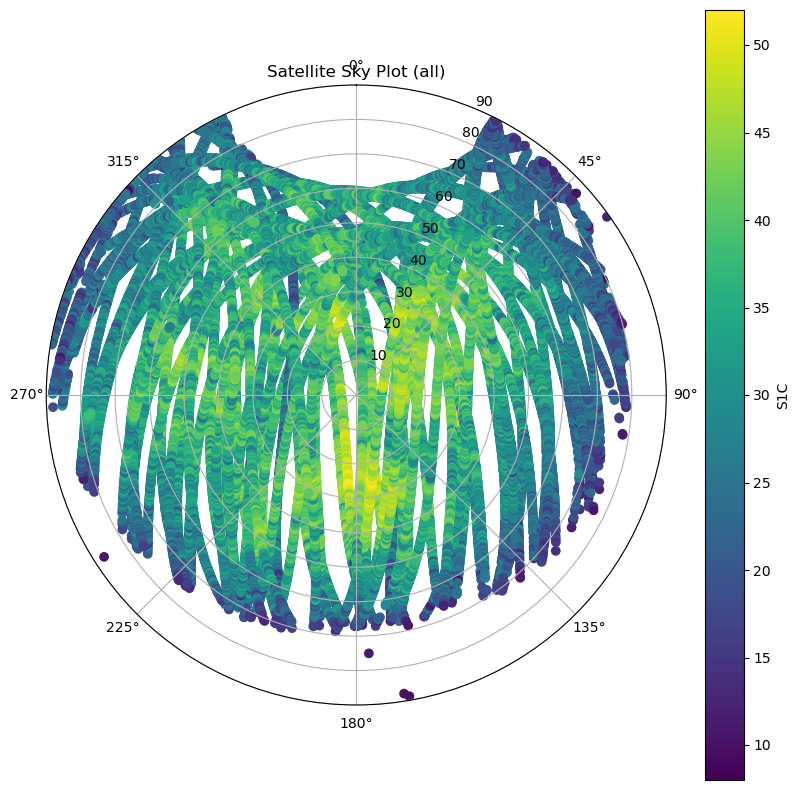

In [13]:

fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(projection='polar'))
radius = 90 - df.Elevation
theta = np.deg2rad(df.Azimuth)

# 
hs = ax.scatter(theta, radius, c=df.S1C, cmap='viridis')
ax.set_rlim([0, 90])
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)  
plt.colorbar(hs, label="S1C")
plt.title("Satellite Sky Plot (all)")
plt.show()


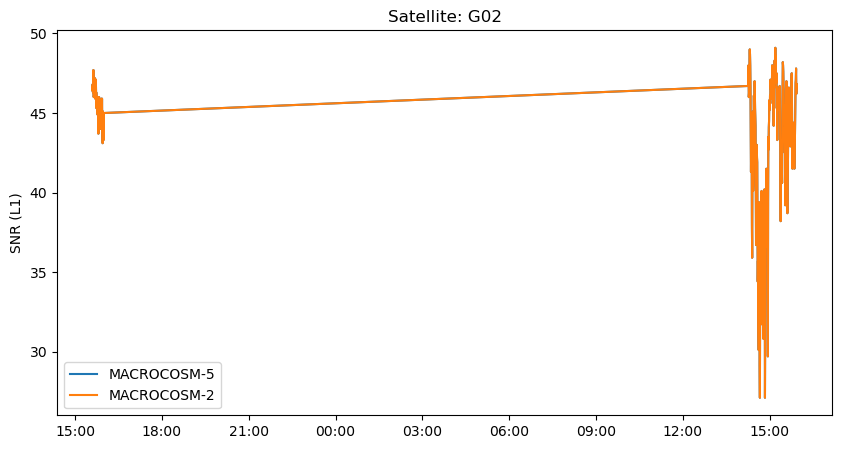

In [22]:
mySV = 'G02'  #

station_names = ['MACROCOSM-5','MACROCOSM-2'] 

fig, ax = plt.subplots(1, figsize=(10, 5))

for i, iname in enumerate(station_names):
    subdf = filtered_df.xs(mySV, level='SV') 
    hs = ax.plot(subdf.index.get_level_values('Epoch'), subdf.S1C, label=iname)

myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('SNR (L1)')
ax.legend()
plt.title(f'Satellite: {mySV}')

plt.show()


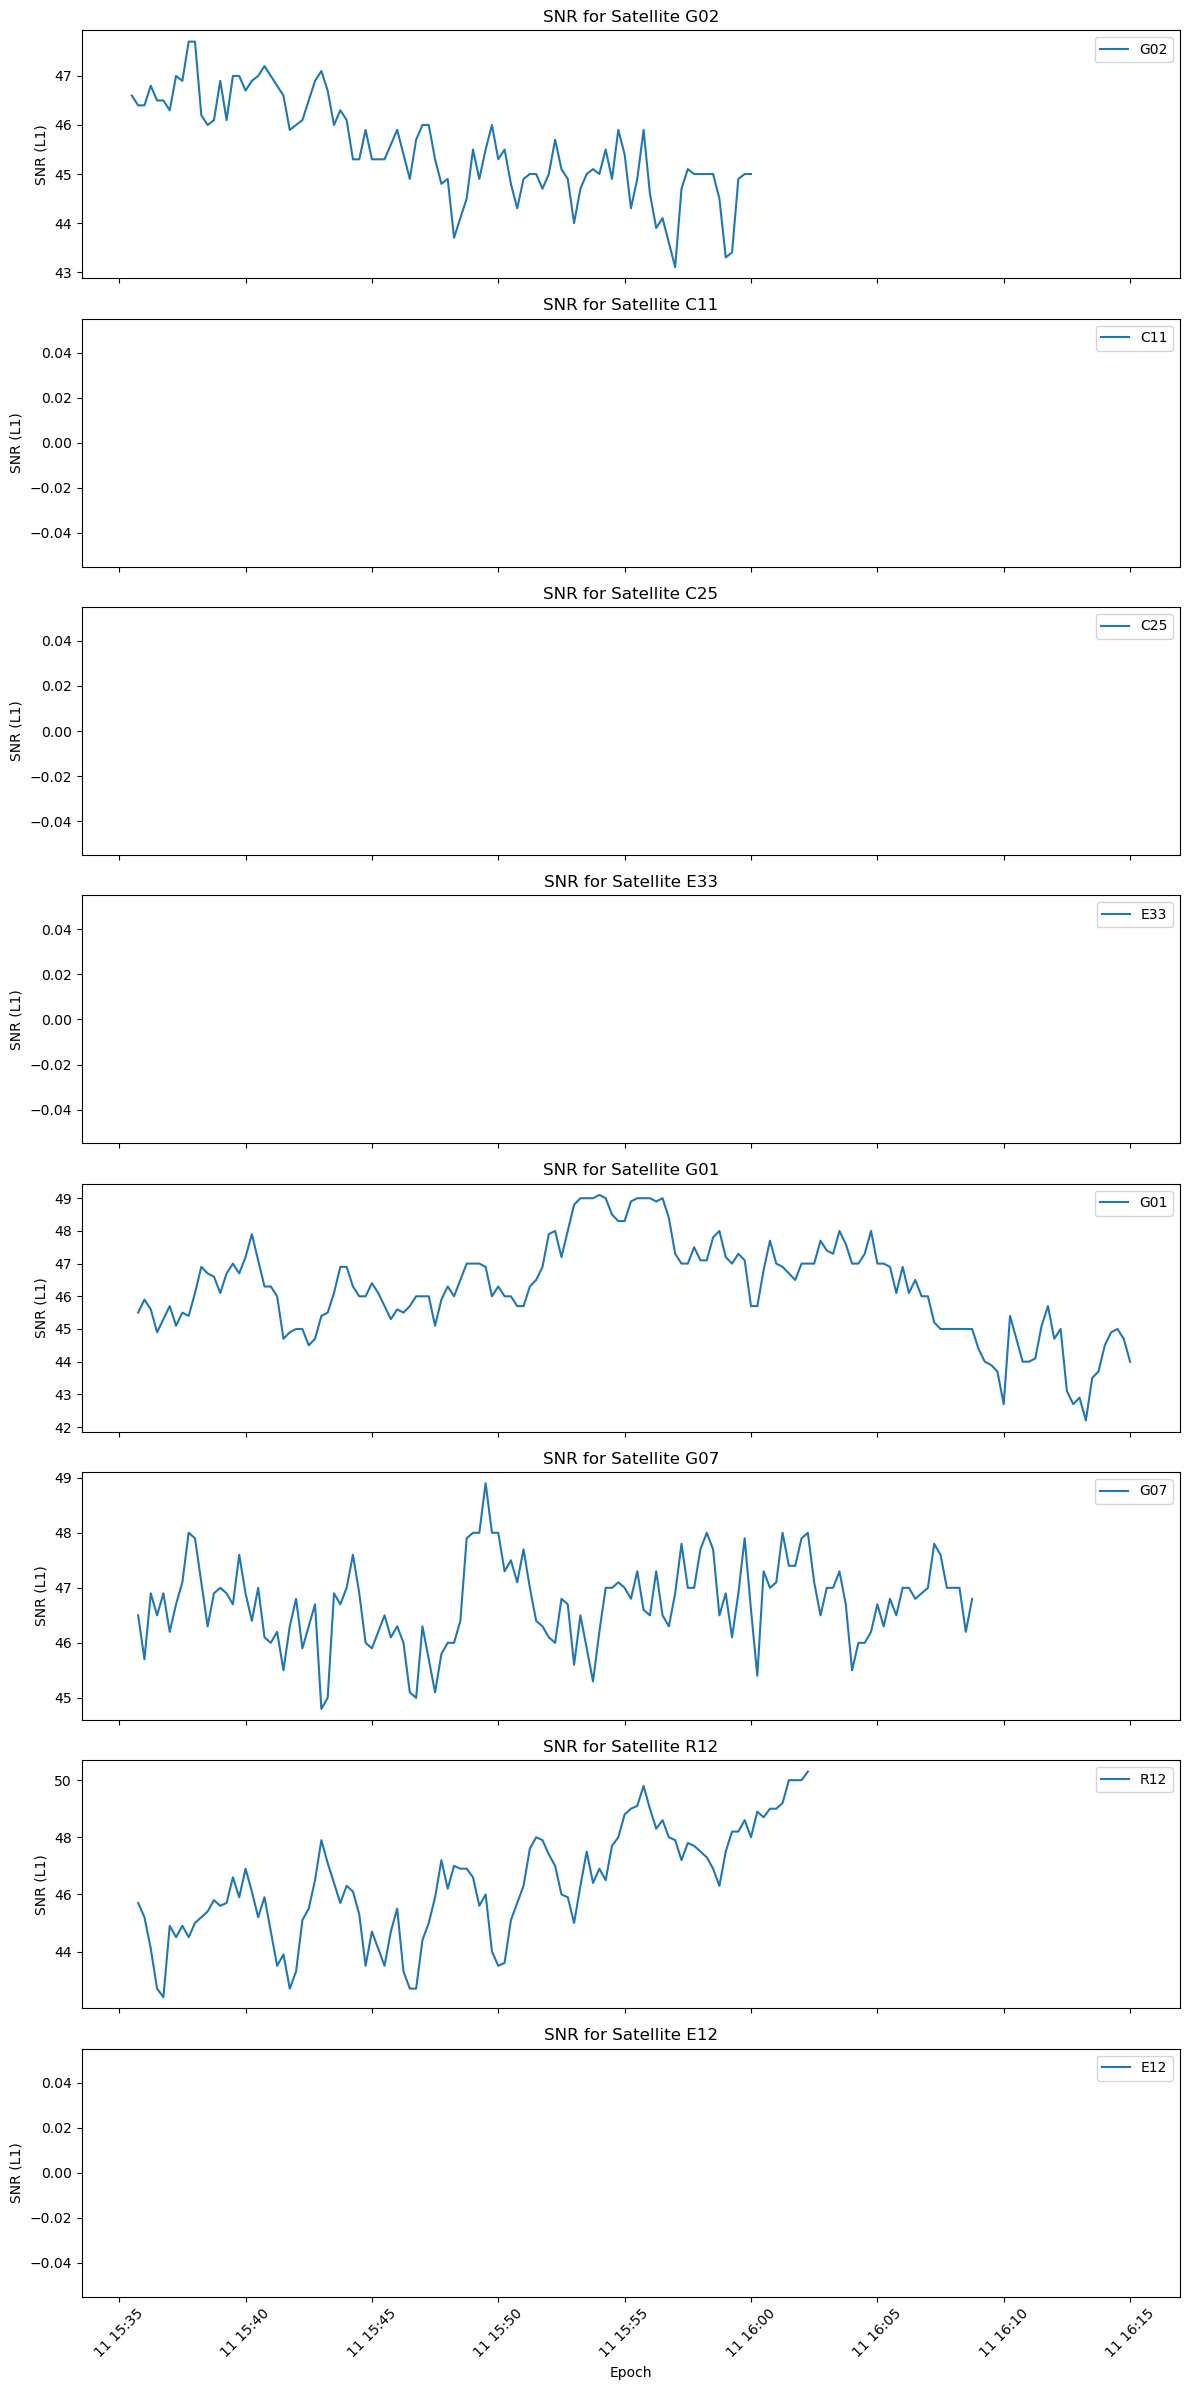

In [13]:
#  subplots to visualize SNR for each satellite with data
num_sv = len(filtered_df.index.get_level_values('SV').unique())
fig, axes = plt.subplots(num_sv, 1, figsize=(12, 3 * num_sv), sharex=True)

#
valid_axes = []
for i, sv in enumerate(filtered_df.index.get_level_values('SV').unique()):
    subdf = filtered_df.xs(sv, level='SV')
    
    #
    if not subdf.empty:
        axes[i].plot(subdf.index.get_level_values('Epoch'), subdf['S1C'], label=sv)
        axes[i].set_ylabel('SNR (L1)')
        axes[i].set_title(f'SNR for Satellite {sv}')
        axes[i].legend()
        valid_axes.append(i) 

# empty subplots removal
for j in range(num_sv):
    if j not in valid_axes:
        fig.delaxes(axes[j]) 

axes[-1].set_xlabel('Epoch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

MACROCOSM-2

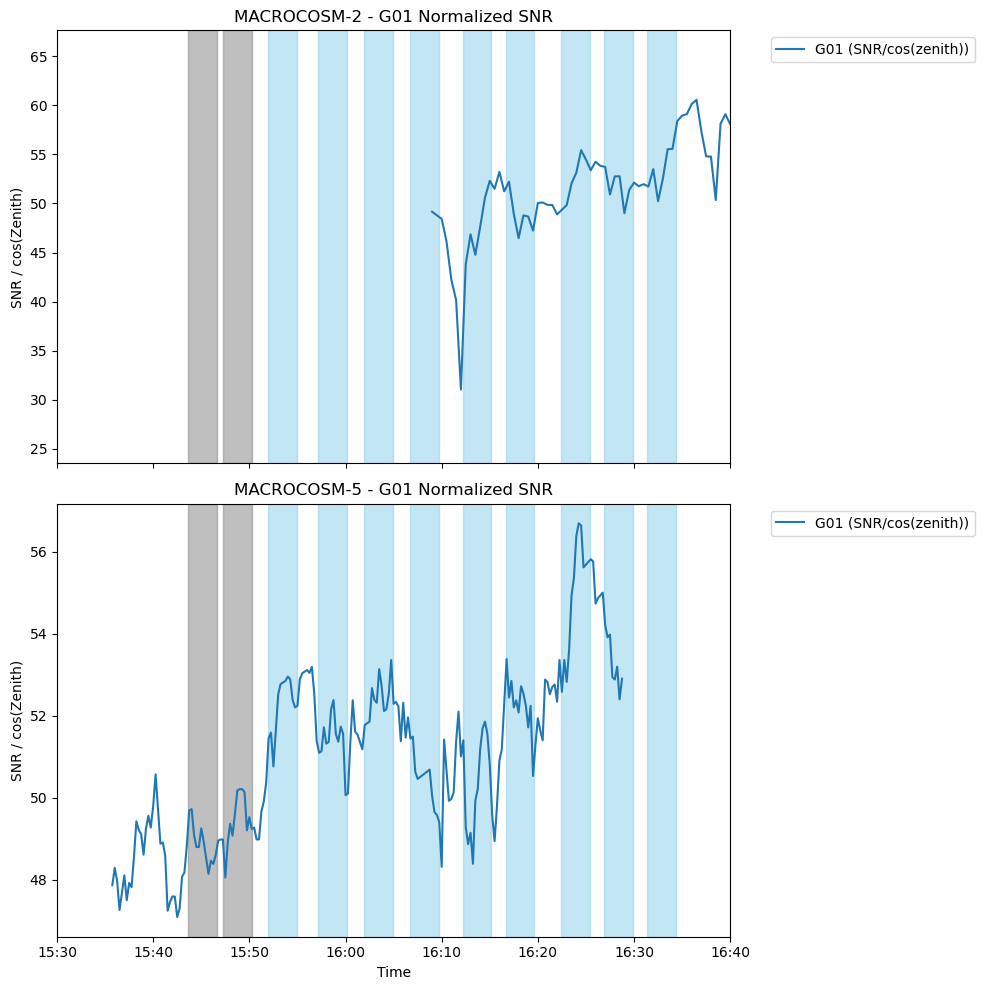

In [16]:
#SNR / cos(Zenith) 
filtered_df["Zenith_radians"] = np.radians(filtered_df["Zenith"])  
filtered_df["SNR_normalized"] = filtered_df["S1C"] / np.cos(filtered_df["Zenith_radians"])

#
df_reset = filtered_df.reset_index()  

#shaded intervals per application
shaded_intervals = [
    ("15:43:40", "15:46:40", "dry"),
    ("15:47:15", "15:50:15", "dry"),
    ("15:51:55", "15:54:56", "wet"),
    ("15:57:09", "16:00:09", "wet"),
    ("16:01:55", "16:04:58", "wet"),
    ("16:06:42", "16:09:44", "wet"),
    ("16:12:10", "16:15:10", "wet"),
    ("16:16:39", "16:19:39", "wet"),
    ("16:22:22", "16:25:23", "wet"),
    ("16:26:55", "16:29:55", "wet"),
    ("16:31:23", "16:34:23", "wet")
]

# 
mySV = ['G01']  
station_names = ['MACROCOSM-2', 'MACROCOSM-5']

# 
date_str = df_reset["Epoch"].iloc[0].strftime("%Y-%m-%d")

#
start_x = datetime.strptime(f"{date_str} 15:30:00", "%Y-%m-%d %H:%M:%S")
end_x   = datetime.strptime(f"{date_str} 16:40:00", "%Y-%m-%d %H:%M:%S")

# 
fig, axes = plt.subplots(nrows=len(station_names), figsize=(10, 5 * len(station_names)), sharex=True)
if len(station_names) == 1:
    axes = [axes]

#  shaded intervals
color_map = {"dry": "gray", "wet": "skyblue"}

#
for ax, station in zip(axes, station_names):
    for satellite in mySV:
        # 
        subdf = df_reset[(df_reset["SV"] == satellite) & (df_reset["Station"] == station)]
        # 
        if not subdf.empty:
            ax.plot(subdf["Epoch"], subdf["SNR_normalized"],
                    label=f"{satellite} (SNR/cos(zenith))")
        else:
            ax.text(0.5, 0.5, f'No data for {station}', ha='center', va='center', transform=ax.transAxes)
    
    # 
    for start_time, end_time, category in shaded_intervals:
        start_dt = datetime.strptime(f"{date_str} {start_time}", "%Y-%m-%d %H:%M:%S")
        end_dt = datetime.strptime(f"{date_str} {end_time}", "%Y-%m-%d %H:%M:%S")
        ax.axvspan(start_dt, end_dt, color=color_map[category], alpha=0.5)
    
    # 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.set_ylabel('SNR / cos(Zenith)')
    ax.set_title(f'{station} - {mySV[0]} Normalized SNR')
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    ax.set_xlim(start_x, end_x)

plt.xlabel("Time")
plt.tight_layout()
plt.show()


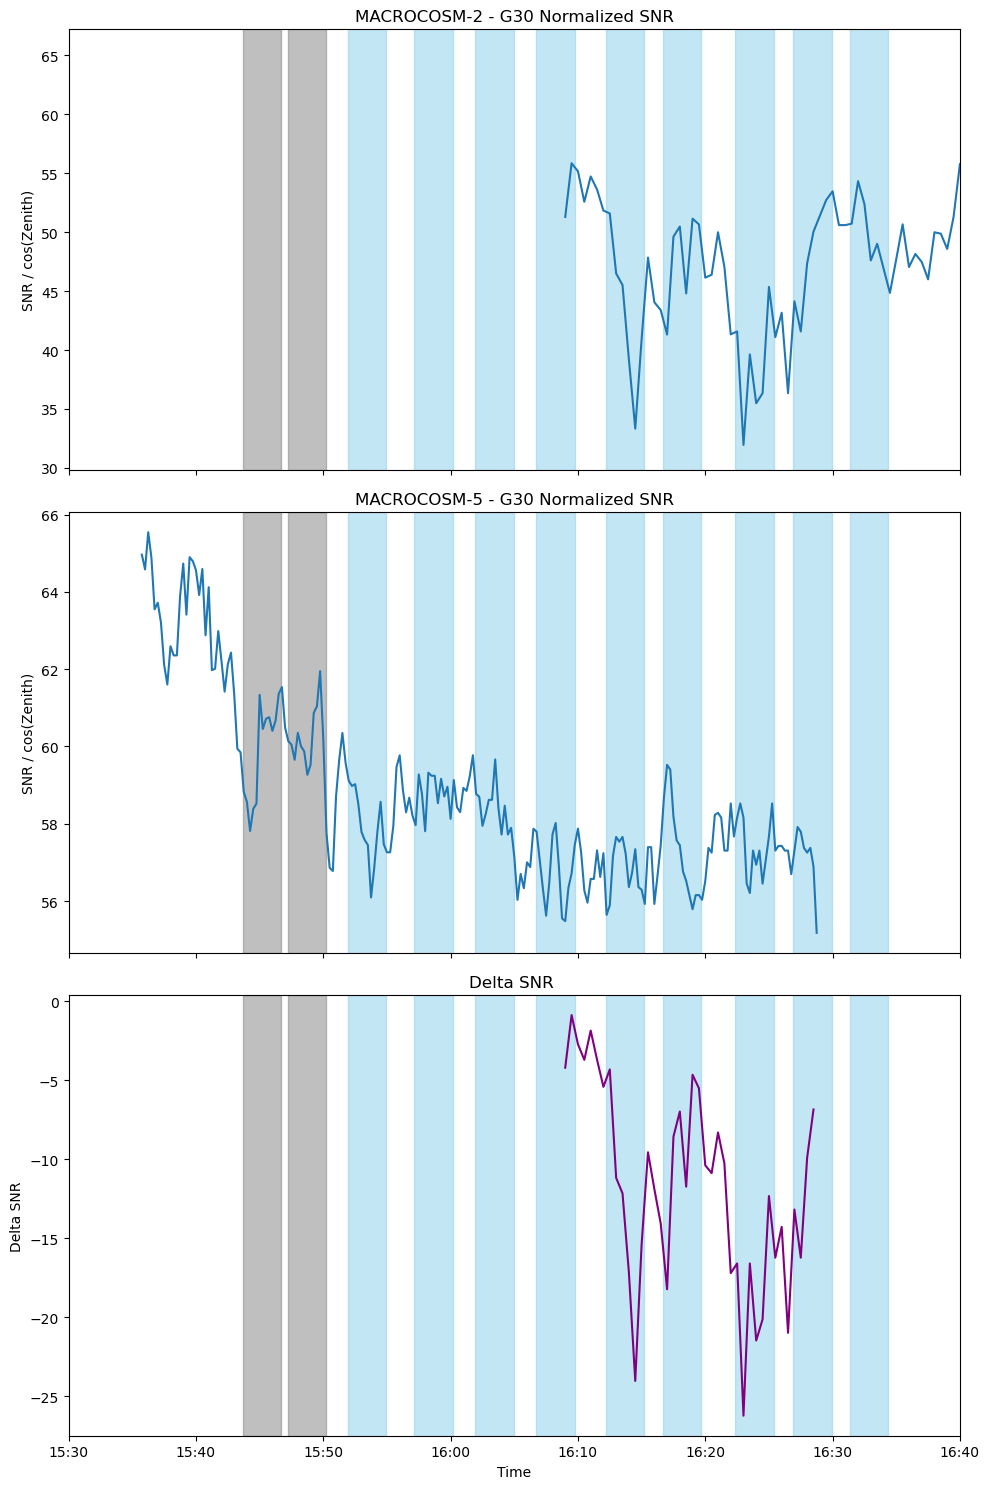

In [27]:
#
filtered_df["Zenith_radians"] = np.radians(filtered_df["Zenith"])  
filtered_df["SNR_normalized"] = filtered_df["S1C"] / np.cos(filtered_df["Zenith_radians"])

#
df_reset = filtered_df.reset_index()  


#

shaded_intervals = [
    ("15:43:40", "15:46:40", "dry"),
    ("15:47:15", "15:50:15", "dry"),
    ("15:51:55", "15:54:56", "wet"),
    ("15:57:09", "16:00:09", "wet"),
    ("16:01:55", "16:04:58", "wet"),
    ("16:06:42", "16:09:44", "wet"),
    ("16:12:10", "16:15:10", "wet"),
    ("16:16:39", "16:19:39", "wet"),
    ("16:22:22", "16:25:23", "wet"),
    ("16:26:55", "16:29:55", "wet"),
    ("16:31:23", "16:34:23", "wet")
]

# 
mySV = ['G30']  
station_names = ['MACROCOSM-2', 'MACROCOSM-5']

# 
date_str = df_reset["Epoch"].iloc[0].strftime("%Y-%m-%d")

# 
start_x = datetime.strptime(f"{date_str} 15:30:00", "%Y-%m-%d %H:%M:%S")
end_x   = datetime.strptime(f"{date_str} 16:40:00", "%Y-%m-%d %H:%M:%S")

#
df_sat = df_reset[df_reset["SV"] == mySV[0]]
pivot = df_sat.pivot(index="Epoch", columns="Station", values="SNR_normalized")
# 
pivot["Delta_SNR"] = pivot["MACROCOSM-2"] - pivot["MACROCOSM-5"]

# 
fig, axes = plt.subplots(nrows=3, figsize=(10, 5 * 3), sharex=True)

# 
color_map = {"dry": "gray", "wet": "skyblue"}

#
for ax, station in zip(axes[:2], station_names):
    for satellite in mySV:
        # 
        subdf = df_reset[(df_reset["SV"] == satellite) & (df_reset["Station"] == station)]
        if not subdf.empty:
            ax.plot(subdf["Epoch"], subdf["SNR_normalized"],
                    label=f"{satellite} (SNR/cos(zenith))")
        else:
            ax.text(0.5, 0.5, f'No data for {station}', ha='center', va='center', transform=ax.transAxes)
    
    # 
    for start_time, end_time, category in shaded_intervals:
        start_dt = datetime.strptime(f"{date_str} {start_time}", "%Y-%m-%d %H:%M:%S")
        end_dt = datetime.strptime(f"{date_str} {end_time}", "%Y-%m-%d %H:%M:%S")
        ax.axvspan(start_dt, end_dt, color=color_map[category], alpha=0.5)
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.set_ylabel('SNR / cos(Zenith)')
    ax.set_title(f'{station} - {mySV[0]} Normalized SNR')
    #ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    ax.set_xlim(start_x, end_x)

# 
ax_delta = axes[2]
# 
delta_df = pivot.dropna(subset=["Delta_SNR"])
if not delta_df.empty:
    ax_delta.plot(delta_df.index, delta_df["Delta_SNR"], color='purple', 
                  label="Delta SNR (MACROCOSM-2 minus MACROCOSM-5)")
else:
    ax_delta.text(0.5, 0.5, 'No delta data available', ha='center', va='center', transform=ax_delta.transAxes)

# 
for start_time, end_time, category in shaded_intervals:
    start_dt = datetime.strptime(f"{date_str} {start_time}", "%Y-%m-%d %H:%M:%S")
    end_dt = datetime.strptime(f"{date_str} {end_time}", "%Y-%m-%d %H:%M:%S")
    ax_delta.axvspan(start_dt, end_dt, color=color_map[category], alpha=0.5)

ax_delta.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax_delta.set_ylabel('Delta SNR')
ax_delta.set_title('Delta SNR ')
#ax_delta.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax_delta.set_xlim(start_x, end_x)

plt.xlabel("Time")
plt.tight_layout()
plt.savefig("deltaSNR.png", format="png")
plt.show()


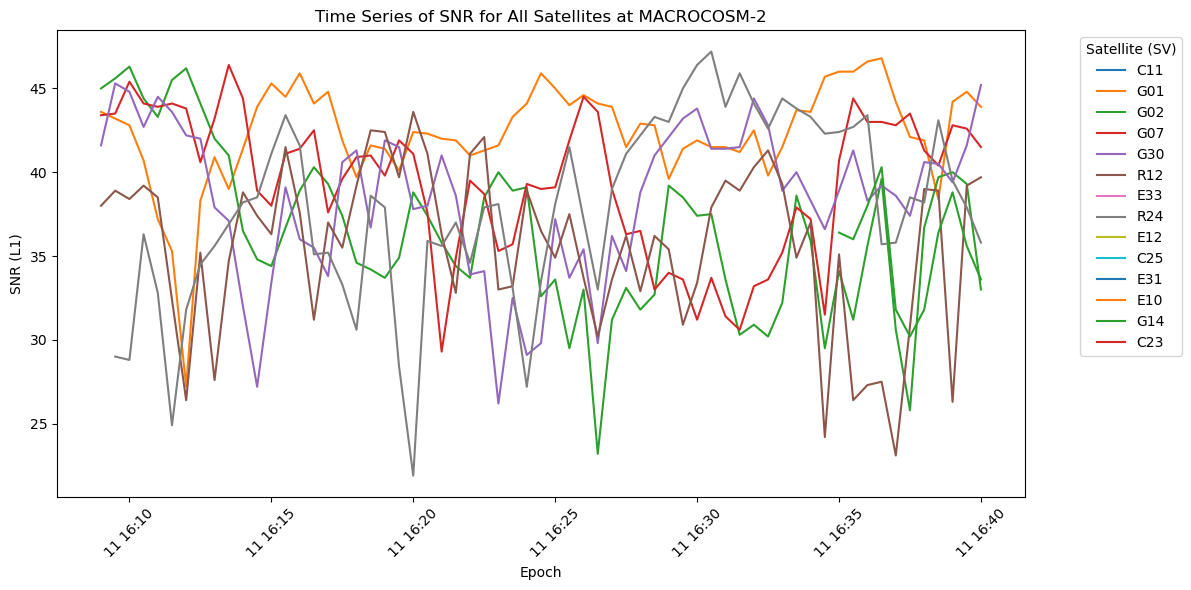

In [19]:

# 
df_reset = filtered_df.reset_index()

# 
date_str = df_reset["Epoch"].iloc[0].strftime("%Y-%m-%d")

# 
start_time = datetime.strptime(f"{date_str} 15:00:00", "%Y-%m-%d %H:%M:%S")
end_time   = datetime.strptime(f"{date_str} 16:40:00", "%Y-%m-%d %H:%M:%S")

# here filtering per station is not really necessary but it helped get rid of an error
df_mac2 = df_reset[(df_reset["Station"] == "MACROCOSM-2") &
                   (df_reset["Epoch"] >= start_time) &
                   (df_reset["Epoch"] <= end_time)]

plt.figure(figsize=(12, 6))
for sv in df_mac2["SV"].unique():
    subdf = df_mac2[df_mac2["SV"] == sv]
    plt.plot(subdf["Epoch"], subdf["S1C"], label=sv)

plt.xlabel("Epoch")
plt.ylabel("SNR (L1)")
plt.title("Time Series of SNR for All Satellites at MACROCOSM-2")
plt.xticks(rotation=45)
plt.legend(title="Satellite (SV)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_39504/3850372458.py:108: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


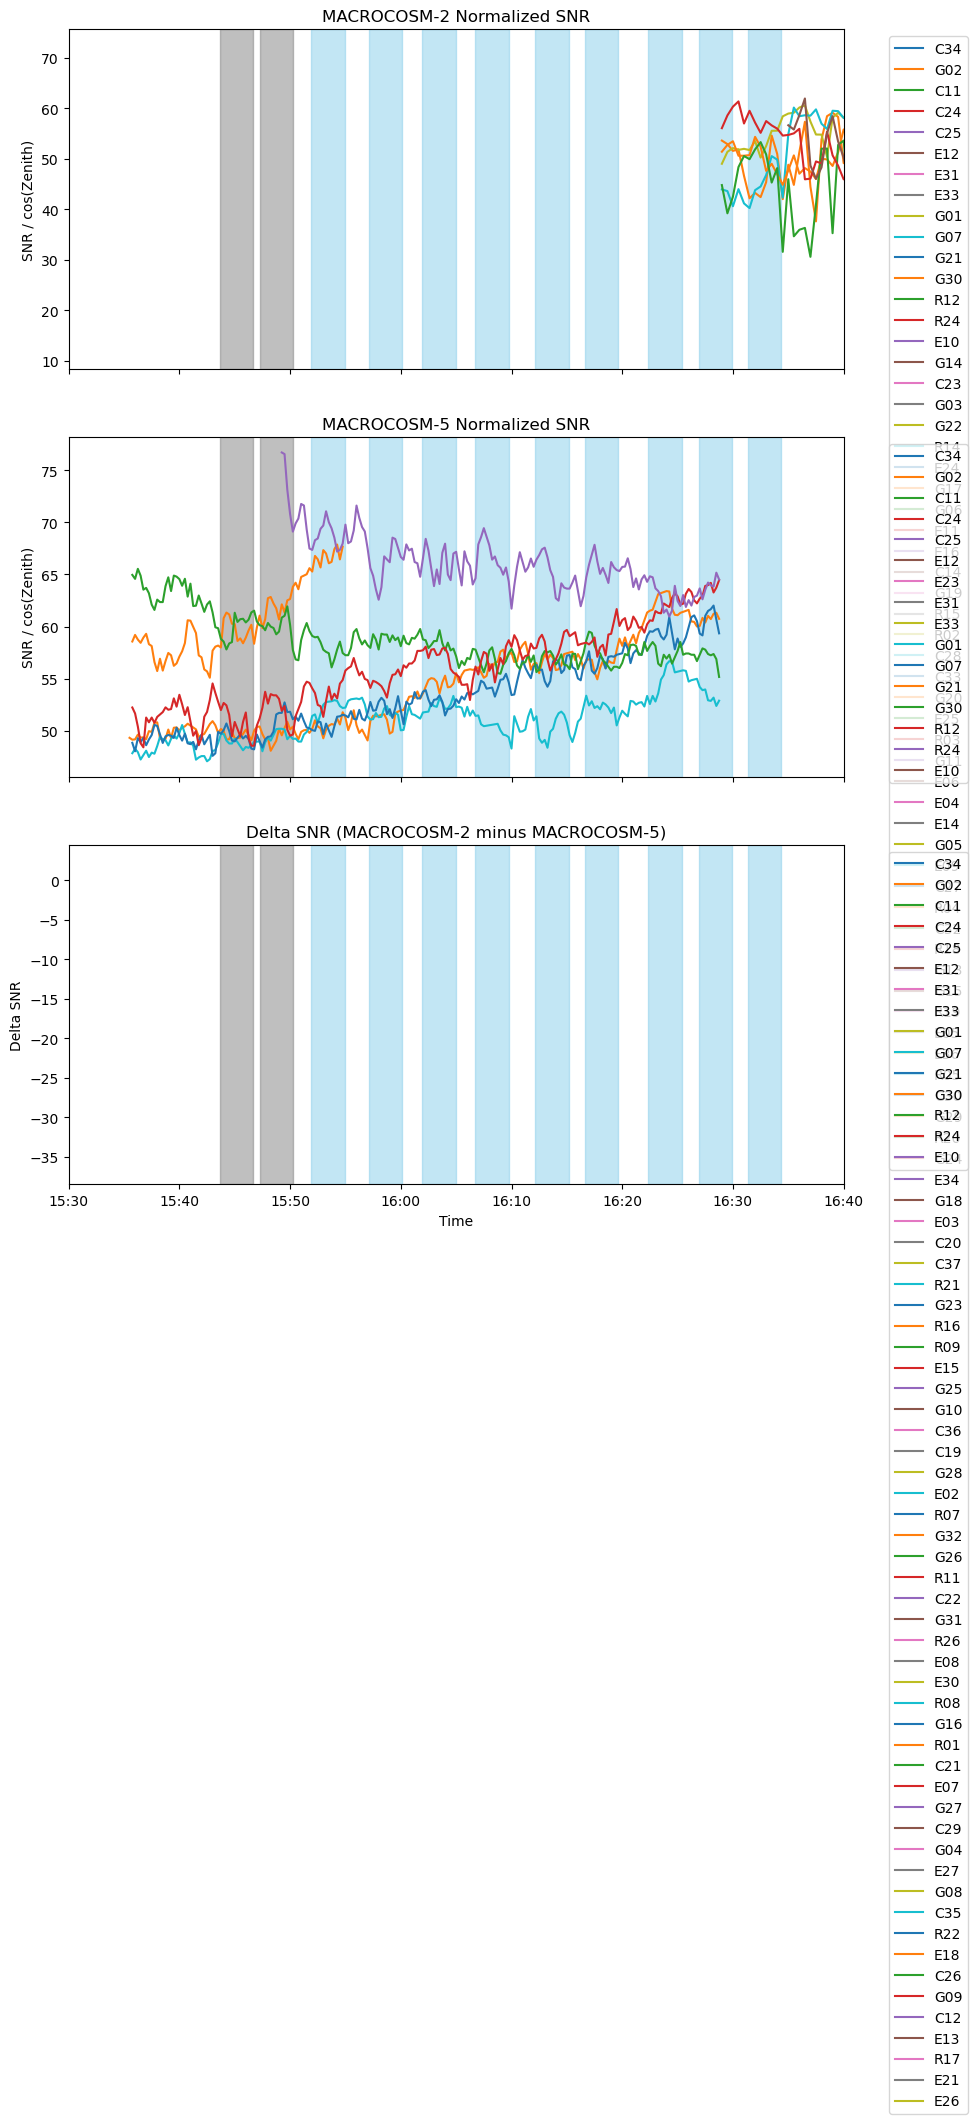

In [28]:
#
filtered_df["Zenith_radians"] = np.radians(filtered_df["Zenith"])  
filtered_df["SNR_normalized"] = filtered_df["S1C"] / np.cos(filtered_df["Zenith_radians"])

df_reset = filtered_df.reset_index()  
# 
shaded_intervals = [
    ("15:43:40", "15:46:40", "dry"),
    ("15:47:15", "15:50:15", "dry"),
    ("15:51:55", "15:54:56", "wet"),
    ("15:57:09", "16:00:09", "wet"),
    ("16:01:55", "16:04:58", "wet"),
    ("16:06:42", "16:09:44", "wet"),
    ("16:12:10", "16:15:10", "wet"),
    ("16:16:39", "16:19:39", "wet"),
    ("16:22:22", "16:25:23", "wet"),
    ("16:26:55", "16:29:55", "wet"),
    ("16:31:23", "16:34:23", "wet")
]

# 
station_names = ['MACROCOSM-2', 'MACROCOSM-5']

# 
satellites = df_reset["SV"].unique()

# 
date_str = df_reset["Epoch"].iloc[0].strftime("%Y-%m-%d")

# Set x-axis limits (adjust these if needed)
start_x = datetime.strptime(f"{date_str} 15:30:00", "%Y-%m-%d %H:%M:%S")
end_x   = datetime.strptime(f"{date_str} 16:40:00", "%Y-%m-%d %H:%M:%S")

# 
color_map = {"dry": "gray", "wet": "skyblue"}

#pivotting df by satellite and station 
pivot = df_reset.pivot(index="Epoch", columns=["SV", "Station"], values="SNR_normalized")

# plotting
fig, axes = plt.subplots(nrows=3, figsize=(10, 5*3), sharex=True)

for ax, station in zip(axes[:2], station_names):
    for sat in satellites:
        col = (sat, station)
        if col in pivot.columns:
            ax.plot(pivot.index, pivot[col], label=f"{sat}")
    # Add shaded intervals to each panel
    for start_time, end_time, category in shaded_intervals:
        start_dt = datetime.strptime(f"{date_str} {start_time}", "%Y-%m-%d %H:%M:%S")
        end_dt   = datetime.strptime(f"{date_str} {end_time}", "%Y-%m-%d %H:%M:%S")
        ax.axvspan(start_dt, end_dt, color=color_map[category], alpha=0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.set_ylabel('SNR / cos(Zenith)')
    ax.set_title(f'{station} Normalized SNR')
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    ax.set_xlim(start_x, end_x)

ax_delta = axes[2]

for sat in satellites:
    col2 = (sat, "MACROCOSM-2")
    col5 = (sat, "MACROCOSM-5")
    if col2 in pivot.columns and col5 in pivot.columns:
        delta = pivot[col2] - pivot[col5]
        ax_delta.plot(pivot.index, delta, label=f"{sat}")
ax_delta.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax_delta.set_ylabel('Delta SNR')
ax_delta.set_title('Delta SNR (MACROCOSM-2 minus MACROCOSM-5)')
ax_delta.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax_delta.set_xlim(start_x, end_x)
# Add shaded intervals to the delta panel as well
for start_time, end_time, category in shaded_intervals:
    start_dt = datetime.strptime(f"{date_str} {start_time}", "%Y-%m-%d %H:%M:%S")
    end_dt   = datetime.strptime(f"{date_str} {end_time}", "%Y-%m-%d %H:%M:%S")
    ax_delta.axvspan(start_dt, end_dt, color=color_map[category], alpha=0.5)

plt.xlabel("Time")
plt.tight_layout()
plt.show()


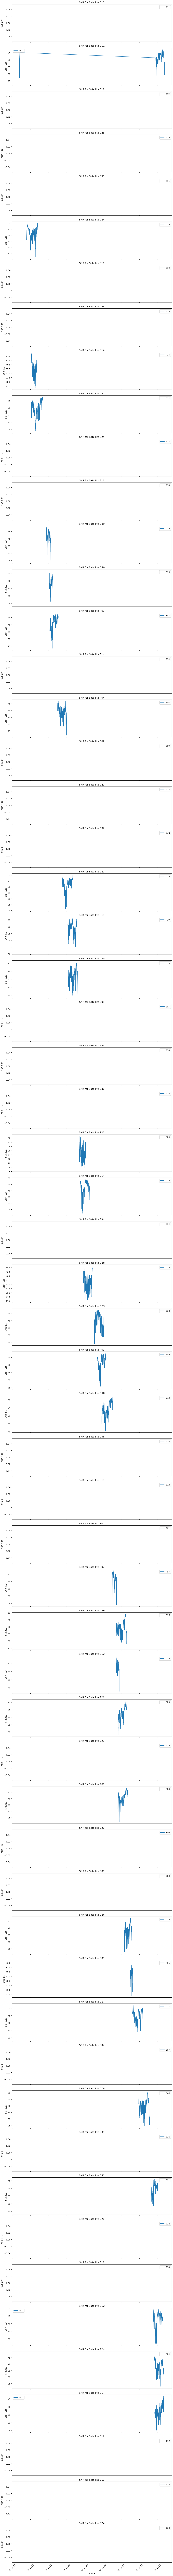

In [26]:
#  subplots to visualize SNR for each satellite with data
num_sv = len(filtered_df.index.get_level_values('SV').unique())
fig, axes = plt.subplots(num_sv, 1, figsize=(12, 3 * num_sv), sharex=True)

#
valid_axes = []
for i, sv in enumerate(filtered_df.index.get_level_values('SV').unique()):
    subdf = filtered_df.xs(sv, level='SV')
    
    #
    if not subdf.empty:
        axes[i].plot(subdf.index.get_level_values('Epoch'), subdf['S1C'], label=sv)
        axes[i].set_ylabel('SNR (L1)')
        axes[i].set_title(f'SNR for Satellite {sv}')
        axes[i].legend()
        valid_axes.append(i) 

# empty subplots removal
for j in range(num_sv):
    if j not in valid_axes:
        fig.delaxes(axes[j]) 

axes[-1].set_xlabel('Epoch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()